In [ ]:
from google.colab import drive
import pandas as pd
import io

# Mount Google Drive
drive.mount('/content/drive')

# Load data
file_path = '/content/drive/MyDrive/Colab Notebooks/Machine learning/CA2/Customer_data.csv'

df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis (EDA)
- Performing initial investigations on data to discover patterns and spot anomalies with the help of summary statistics and graphical representations.

In [ ]:
# Check first 5 rows
df.head()

,CustomerID,Gender,Age,Income (k$),How Much They Spend ($),Salary (k$),Spend to income ratio,Alpha
0,1,Male,19,15,39,1.054960,0.036968,1
1,2,Male,21,15,81,0.676210,0.119785,1
2,3,Female,20,16,6,0.562232,0.010672,1
3,4,Female,23,16,77,1.284359,0.059952,1
4,5,Female,31,17,40,0.806683,0.049586,1


- Check the dimension data.
- There are 200 rows and 8 columns.

In [ ]:
# Check the shape of dataset & find out total number of rows and columns
df.shape

(200, 8)

- To ensure that different columns have
the correct data type before
beginning analysis.

In [ ]:
# Identify the numerical and categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               200 non-null    int64  
 1   Gender                   200 non-null    object 
 2   Age                      200 non-null    int64  
 3   Income (k$)              200 non-null    int64  
 4   How Much They Spend ($)  200 non-null    int64  
 5   Salary (k$)              200 non-null    float64
 6   Spend to income ratio    200 non-null    float64
 7   Alpha                    200 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 12.6+ KB


- To ensure that categorical columns
have correct and consistent
categories.

In [ ]:
print(f"Verifying 'Gender' column for inconsistent categories:")
print(f"Unique values in 'Gender' column: {df['Gender'].unique()}")

Verifying 'Gender' column for inconsistent categories:
Unique values in 'Gender' column: ['Male' 'Female']


- No missing values

In [ ]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
CustomerID                 0
Gender                     0
Age                        0
Income (k$)                0
How Much They Spend ($)    0
Salary (k$)                0
Spend to income ratio      0
Alpha                      0
dtype: int64


-  No duplicated row.

In [ ]:
print("Checking for duplicate rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Checking for duplicate rows:
Number of duplicate rows: 0


- Ensuring that different columns have
the correct range. Example: age
- Ensuring that numeric columns have
the same units.
- Rrequire StandardScaler for features because big range

In [ ]:
print("Statistical Summary")
print(df.describe())

Statistical Summary
       CustomerID         Age  Income (k$)  How Much They Spend ($)  \
count  200.000000  200.000000   200.000000               200.000000   
mean   100.500000   38.850000    60.560000                50.200000   
std     57.879185   13.969007    26.264721                25.823522   
min      1.000000   18.000000    15.000000                 1.000000   
25%     50.750000   28.750000    41.500000                34.750000   
50%    100.500000   36.000000    61.500000                50.000000   
75%    150.250000   49.000000    78.000000                73.000000   
max    200.000000   70.000000   137.000000                99.000000   

       Salary (k$)  Spend to income ratio      Alpha  
count   200.000000             200.000000  200.00000  
mean      4.538022               0.015816    2.50000  
std       2.214437               0.017091    1.12084  
min       0.562232               0.000157    1.00000  
25%       2.963534               0.008362    1.75000  
50%       

- Check the distribution for all numerical variables with histogram and KDE.
- "Spend to salary ratio" feature is excluded because it is similar to "How Much They Spend" and "Salary".

Distribution Plots for Numerical Features


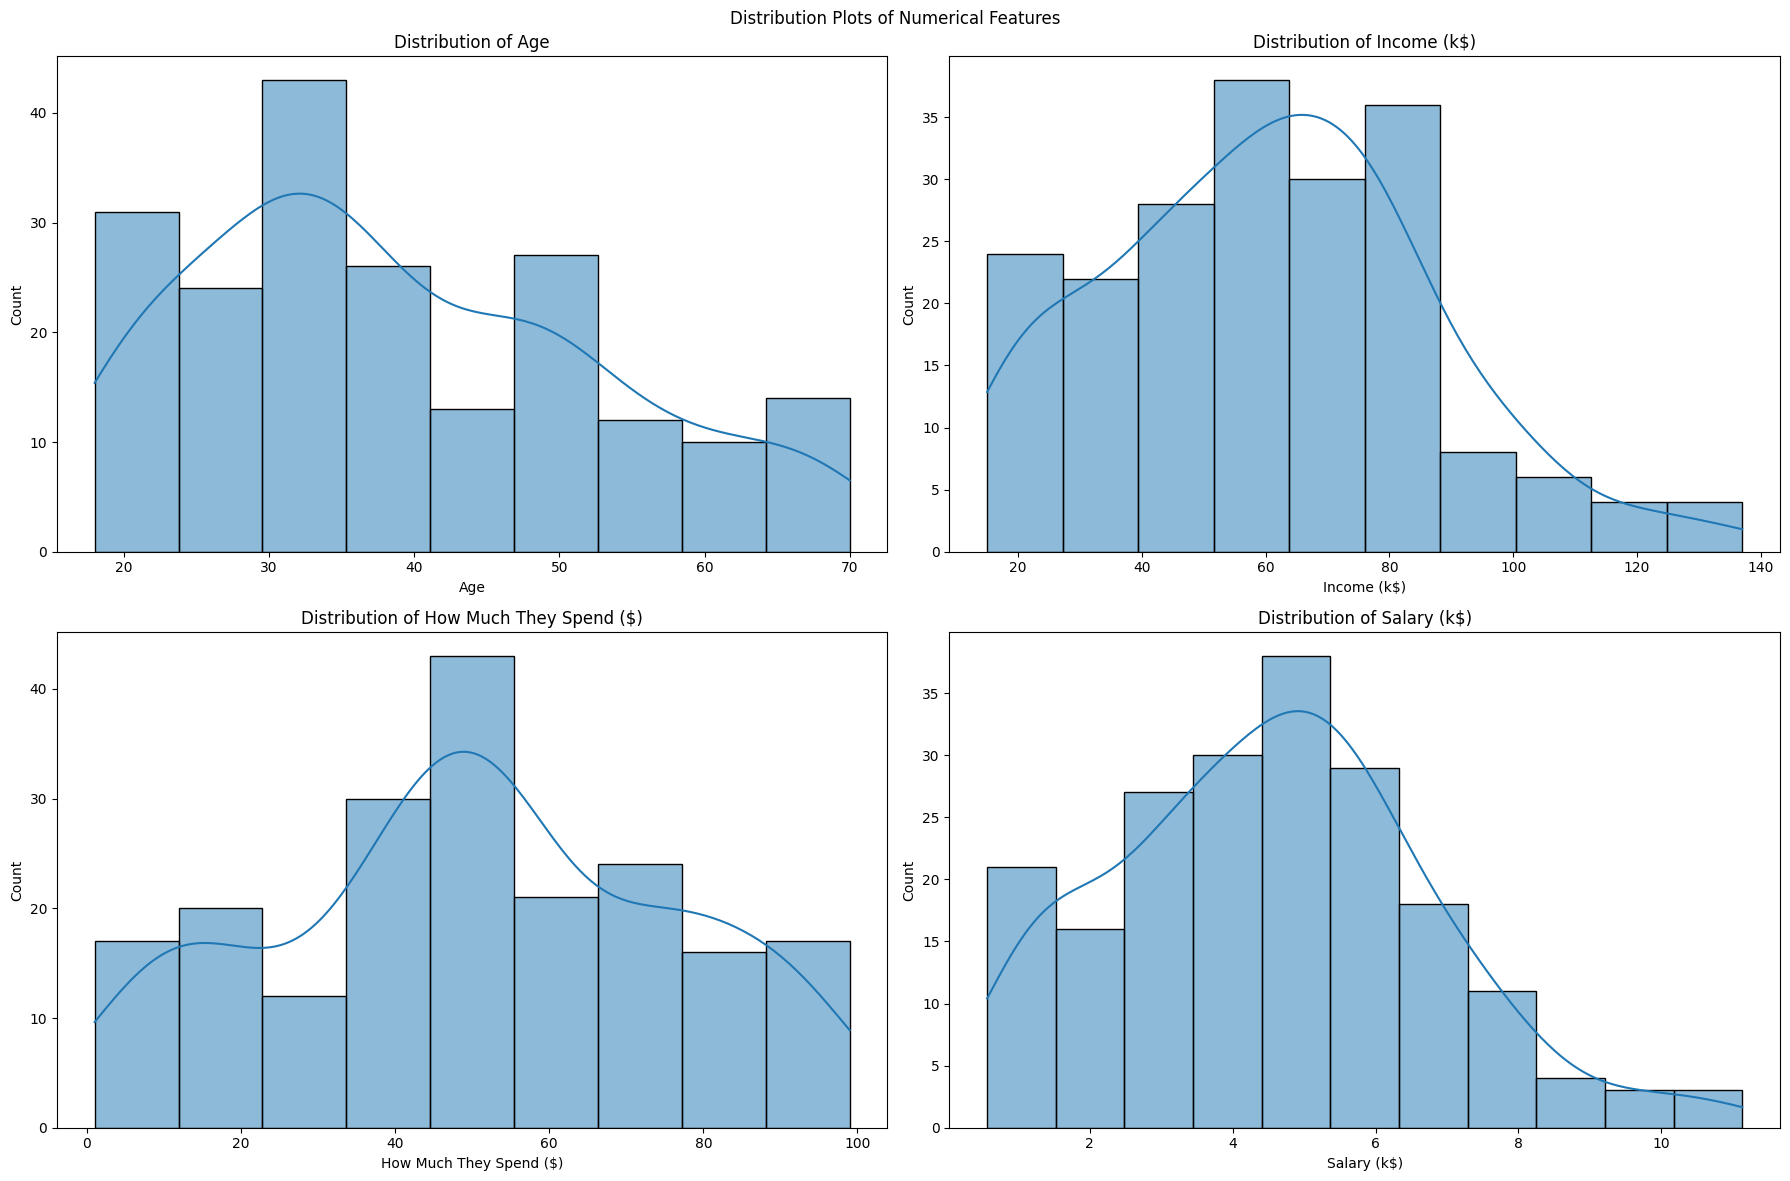

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Age', 'Income (k$)', 'How Much They Spend ($)', 'Salary (k$)']

# Check distribution-skewness with Density Plots with histograms)
print("Distribution Plots for Numerical Features")
plt.figure(figsize=(18, 12)) # Adjusted figure size for better layout
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)  # Grid with 2 rows and 2 columns (for a total of 4 possible subplot positions).
    sns.histplot(df[col], kde=True, bins='auto') # KDE stands for Kernel Density Estimate. It is a curve to visualize the probability density function. bins='auto' is auto choose number of bi.
    plt.title(f"Distribution of {col}")
plt.suptitle("Distribution Plots of Numerical Features")
plt.tight_layout()
plt.show()

- Check categorial variable with count plot.
- The quantity of female is slightly more than male.

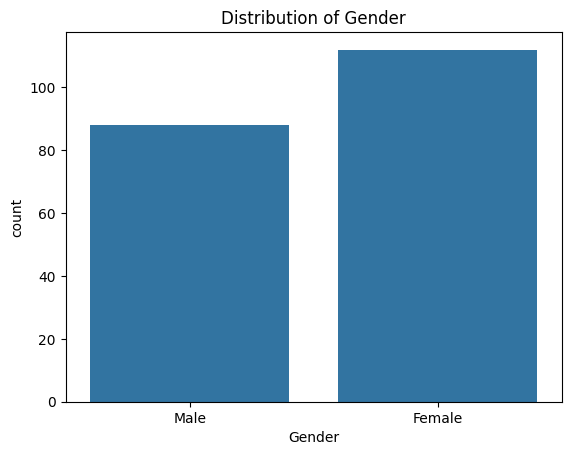

In [ ]:
# Check the distribution of categorial
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.show()

- Use correlation heatmap to find the highly correlated features.
- "Salary (k$)" feature and "Income (k$)" feature are highly correlated features because they are above 0.80

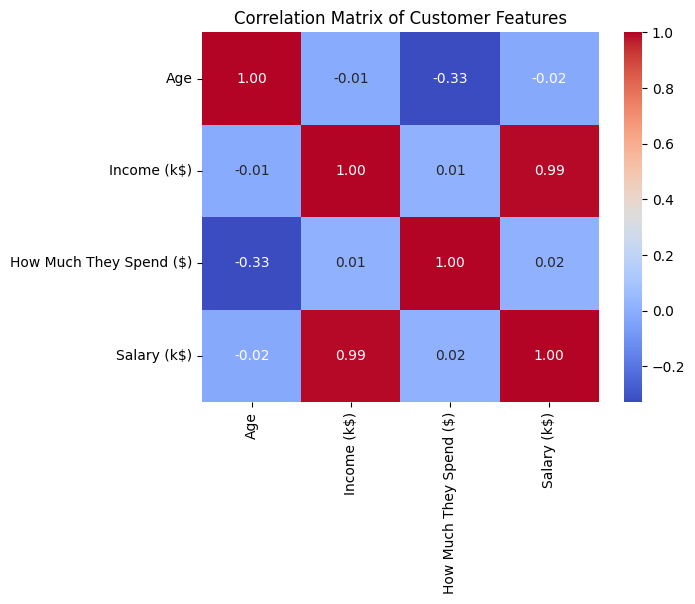

In [ ]:
# Correlation Heatmap for numerical features
cor_heatmap_features = df[['Age', 'Income (k$)', 'How Much They Spend ($)', 'Salary (k$)']]

correlation_matrix = cor_heatmap_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Customer Features")
plt.show()

# Data cleaning

In [ ]:
# Remove redundant features/columns
print("Performing data cleaning (drop redundant features/columns):")
df_cleaned = df.drop(['CustomerID', 'Salary (k$)', 'Spend to income ratio', 'Alpha'], axis=1)
# Preview first 5 rows to confirm the updated dataframe
df_cleaned.head()

Performing data cleaning (drop redundant features/columns):


,Gender,Age,Income (k$),How Much They Spend ($)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# k-means clustering with Elbow Method

- "Gender" feature is excluded because it is a categorial variable.
- StandardScaler transforms each feature so that it has a mean of 0 and a variance of 1. This puts all features on the same scale and ensures that each feature contributes equally to the distance calculations in the k-means algorithm.
- The point of the elbow is the spot where the inertia begins to decrease much more slowly.
-  Elbow method is not always a sharp and obvious point. It is highly
subjective.
- In this case k=5 is the best.


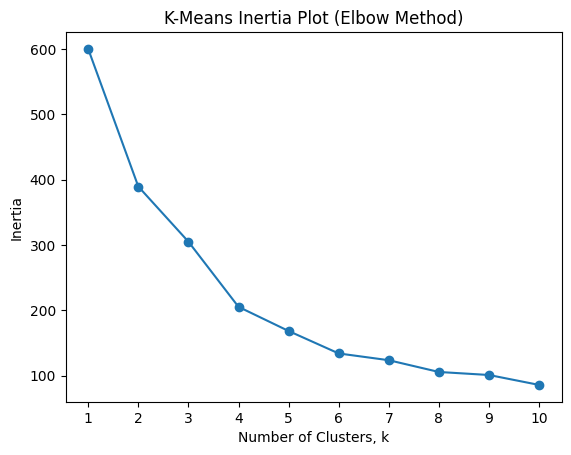

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

features = df_cleaned[['Age', 'Income (k$)', 'How Much They Spend ($)']]

# Use Elbow method to test k-means with different values of k
ks = range(1, 11)
inertias = []

for k in ks:
    pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=k)) #Create pipeline to chain standard scaler and KMeans into a single object.
    pipeline.fit(features)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)  # Calculate and save the quality score (inertia)

# Plot ks vs inertias to find the elbow
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.title('K-Means Inertia Plot (Elbow Method)')
plt.xticks(ks)
plt.show()


# Silhouette analysis

- We can use Silhouette Coefficient score for double check the number of k.
- Use for loop to find the Silhouette Coefficient score from range 2 to 11.
- The highest Silhouette Coefficient is the best k.
- In this case k=5 is the best, which is same as Elbow Method.

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Coefficient method to test k-means with different values of k
ks = range(2, 11)

for k in ks:
    pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
    labels = pipeline.fit_predict(features)
    sil_coeff = silhouette_score(features, labels, metric='euclidean')
    print(f"For n_clusters={k}, The Silhouette Coefficient is {sil_coeff}")

For n_clusters=2, The Silhouette Coefficient is 0.276257743689132
For n_clusters=3, The Silhouette Coefficient is 0.3098948012315897
For n_clusters=4, The Silhouette Coefficient is 0.3825939315551745
For n_clusters=5, The Silhouette Coefficient is 0.41618308781722624
For n_clusters=6, The Silhouette Coefficient is 0.33344067325443133
For n_clusters=7, The Silhouette Coefficient is 0.38903382060067765
For n_clusters=8, The Silhouette Coefficient is 0.3626353846695389
For n_clusters=9, The Silhouette Coefficient is 0.36070008501307327
For n_clusters=10, The Silhouette Coefficient is 0.34567052644705387


# Customer segmentation

- Group them into 5 groups with different of gender (mean), age (median), income (median) and how much they spend (median)

In [ ]:
# Best k from the elbow plot
best_k = 5

# Create the final pipeline with the best k
final_pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=best_k))
# Add a new "Cluster" column to "df_cleaned" dataframe after train the K-Means model and find the cluster labels
df_cleaned['Cluster'] = final_pipeline.fit_predict(features)

# Create a DataFrame with CustomerID in labeled cluster numbers
kmeans_pairs = pd.DataFrame({'kmeans_labels': df_cleaned['Cluster'], 'CustomerID': df['CustomerID'], 'Gender': df_cleaned['Gender'], 'Age':df_cleaned['Age'], 'Income (k$)':df_cleaned['Income (k$)'], 'How Much They Spend ($)':df_cleaned['How Much They Spend ($)']})
# List out all customers' info follow clusters numbers in ascending order
print("K-Means Clustering: Customer Segments (sorted by cluster)")
print(kmeans_pairs.sort_values('kmeans_labels'))

# Split "Gender" column into "Gender_Male" and "Gender_Female" columns
gender_dummies = pd.get_dummies(df_cleaned['Gender'])
df_cleaned_concat = pd.concat([df_cleaned, gender_dummies.add_prefix('Gender_')], axis=1)
# Drop the original 'Gender' column
df_cleaned_detailed = df_cleaned_concat.drop('Gender', axis=1)
# Display the first 5 rows of the updated DataFrame
df_cleaned_detailed.head()

cluster_characteristics = df_cleaned_detailed.groupby('Cluster').agg({'Gender_Male': 'mean', 'Gender_Female': 'mean', 'Age': 'median', 'Income (k$)': 'median', 'How Much They Spend ($)': 'median'}).round(2)
print("Customer Cluster Characteristics (K-Means)")
print(cluster_characteristics)

K-Means Clustering: Customer Segments (sorted by cluster)
     kmeans_labels  CustomerID  Gender  Age  Income (k$)  \
0                0           1    Male   19           15   
1                0           2    Male   21           15   
3                0           4  Female   23           16   
4                0           5  Female   31           17   
7                0           8  Female   23           18   
..             ...         ...     ...  ...          ...   
186              4         187  Female   54          101   
194              4         195  Female   47          120   
192              4         193    Male   33          113   
196              4         197  Female   45          126   
198              4         199    Male   32          137   

     How Much They Spend ($)  
0                         39  
1                         81  
3                         77  
4                         40  
7                         94  
..                       ...  
186 

# Alternative clustering algorithm (hierarchical clustering) for customer segmentation

- Read from the bottom up. Start with the individual at the bottom.
- Vertical lines represent clusters: Each "U" shape like line connects two or more items into a cluster.

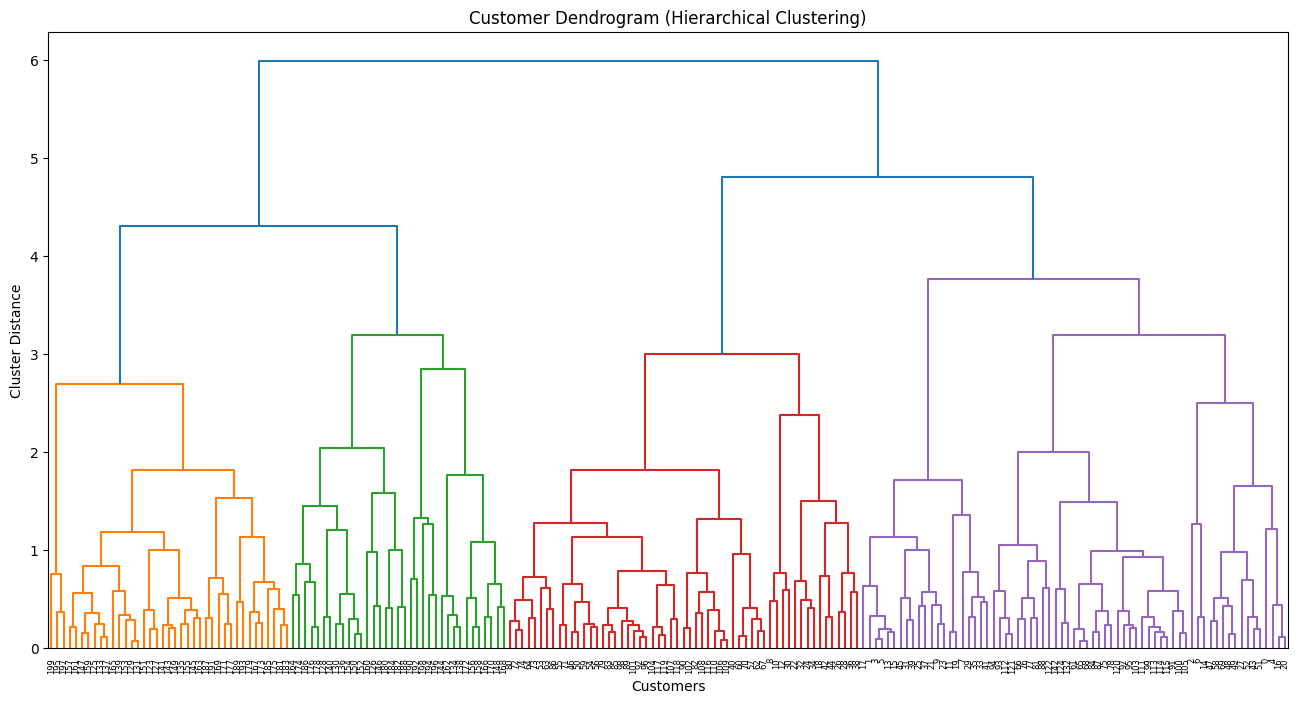

In [ ]:
# Hierarchical clustering (alternative clustering algorithm)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
mergings = linkage(scaled_features, method='complete')  # method='complete' is distance between two clusters is the maximum distance between any two samples

plt.figure(figsize=(16, 8))
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.title("Customer Dendrogram (Hierarchical Clustering)")
plt.xlabel("Customers")
plt.ylabel("Cluster Distance")
plt.show()

# Extract cluster labels

- Cluster distance 4.5 is the longest vertical line that is not intersected by other horizontal lines (merges), suitable for extracting cluster labels.
- Group them into 3 groups with different of gender (mean), age (median), income (median) and how much they spend (median).

In [ ]:
# Extracting cluster labels using fcluster

max_dist = 4.5  # Longest vertical line that is not intersected by other horizontal lines
hierarchical_labels = fcluster(mergings, max_dist, criterion='distance')

# Label the DataFrame with CustomerIDs.
hierarchical_pairs = pd.DataFrame({'hierarchical_label': hierarchical_labels, 'CustomerID': df['CustomerID'], 'Gender': df_cleaned['Gender'], 'Age':df_cleaned['Age'], 'Income (k$)':df_cleaned['Income (k$)'], 'How Much They Spend ($)':df_cleaned['How Much They Spend ($)']})

# Sort by the 'labels' column to group customers by their hierarchical cluster
print("Hierarchical Clustering: Customer Segments (sorted by cluster)")
print(hierarchical_pairs.sort_values('hierarchical_label'))

# Add new "hierarchical_labels" column to "df_cleaned_detailed" dataframe
df_cleaned_detailed['hierarchical_labels'] = hierarchical_labels

# Analyze the resulting clusters
hierarchical_group_characteristics = df_cleaned_detailed.groupby('hierarchical_labels').agg({'Gender_Male': 'mean', 'Gender_Female': 'mean', 'Age': 'median', 'Income (k$)': 'median', 'How Much They Spend ($)': 'median'}).round(2)

print("Customer Cluster Characteristics (K-Means)")
print(hierarchical_group_characteristics)

Hierarchical Clustering: Customer Segments (sorted by cluster)
     hierarchical_label  CustomerID  Gender  Age  Income (k$)  \
123                   1         124    Male   39           69   
127                   1         128    Male   40           71   
126                   1         127    Male   43           71   
125                   1         126  Female   31           70   
187                   1         188    Male   28          101   
..                  ...         ...     ...  ...          ...   
122                   3         123  Female   40           69   
115                   3         116  Female   19           65   
114                   3         115  Female   18           65   
142                   3         143  Female   28           76   
132                   3         133  Female   25           72   

     How Much They Spend ($)  
123                       91  
127                       95  
126                       35  
125                       77  
1

# Conclusions and Business Insights

Characteristics of each customer cluster based on Elbow Method:
- Cluster 0: 41% male and 59% female with a median age of 24 years. The median income is $40k and the median spending is $58k
- Cluster 1: 45% male and 55% female with a median age of 32 years. The median income is $78.5k and the median spending is $83k
- Cluster 2: 43% male and 57% female with a median age of 53.5 years. The median income is $49k and the median spending is $46k
- Cluster 3: 41% male and 59% female with a median age of 23.5 years. The median income is $24.5k and the median spending is $77k
- Cluster 4: 56% male and 44% female with a median age of 43 years. The median income is $86.5k and the median spending is $16k


Characteristics of each customer cluster based on hierarchical clustering:
- Cluster 1: 51% male and 49% female with a median age of 35 years. The median income is $81k and the median spending is $68.5k
- Cluster 2: 44% male and 56% female with a median age of 53 years. The median income is $48k and the median spending is $46k
- Cluster 3: 36% male and 64% female with a median age of 26 years. The median income is $43k and the median spending is $54k


Question: Which group of customers in this dataset should we pay more attention to?
- Pay more attention to customers with a median age of 32/35 years (quite young). The median income is $78.5k/$81k and the median spending is the highest which as $83k/$68.5k